In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=700, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

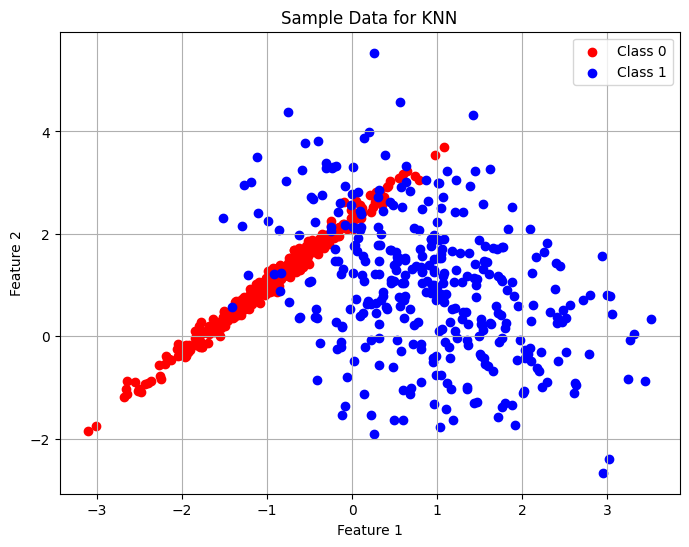

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Sample Data for KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import ipywidgets as widgets
from ipywidgets import interact

# Interactive function for ENN
@interact(k=widgets.IntSlider(min=1, max=X.shape[0] - 1, step=1, value=3))
def enn_calc(k):
    # Create and fit k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(X)
    accuracy = np.mean(y == y_pred) * 100
    
    # Identify misclassified instances
    to_remove = []
    for i, instance in enumerate(X):
        # Exclude the current instance
        neighbors = np.delete(X, i, axis=0)
        neighbors_labels = np.delete(y, i)
        knn.fit(neighbors, neighbors_labels)
        predicted_label = knn.predict(instance.reshape(1, -1))[0]
        
        # Mark instance for removal if misclassified
        if predicted_label != y[i]:
            to_remove.append(i)
    
    # Clean the dataset
    X_cleaned = np.delete(X, to_remove, axis=0)
    y_cleaned = np.delete(y, to_remove)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Original data
    ax[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    ax[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax[0].scatter(X[to_remove][:, 0], X[to_remove][:, 1], color='green', label='Misclassified')
    ax[0].set_title(f'Original Data (Accuracy: {accuracy:.2f}%)')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    ax[0].legend()
    ax[0].grid(True)

    # Data after ENN
    ax[1].scatter(X_cleaned[y_cleaned == 0][:, 0], X_cleaned[y_cleaned == 0][:, 1], color='red', label='Class 0')
    ax[1].scatter(X_cleaned[y_cleaned == 1][:, 0], X_cleaned[y_cleaned == 1][:, 1], color='blue', label='Class 1')
    ax[1].set_title(f'Data after ENN (Instances removed: {len(to_remove)})')
    ax[1].set_xlabel('Feature 1')
    ax[1].set_ylabel('Feature 2')
    ax[1].legend()
    ax[1].grid(True)

    plt.show()


interactive(children=(IntSlider(value=3, description='k', max=699, min=1), Output()), _dom_classes=('widget-in…

In [5]:
@interact(k=widgets.IntSlider(min=1, max=X.shape[0] - 1, step=1, value=3))
def enn_visualization(k):
    """
    Interactive function to visualize the effect of Edited Nearest Neighbors (ENN)
    on a dataset using k-NN classifier and meshgrid decision boundary visualization.
    
    Parameters:
    - k: Number of neighbors for k-NN classifier.
    """
    
    # Create and fit k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict and calculate accuracy on the original dataset
    y_pred = knn.predict(X)
    original_accuracy = np.mean(y == y_pred) * 100
    
    # Identify misclassified instances for ENN
    misclassified_indices = []
    for i, instance in enumerate(X):
        # Exclude the current instance for leave-one-out validation
        X_excluded = np.delete(X, i, axis=0)
        y_excluded = np.delete(y, i)
        knn.fit(X_excluded, y_excluded)
        predicted_label = knn.predict(instance.reshape(1, -1))[0]
        
        # Mark instance for removal if misclassified
        if predicted_label != y[i]:
            misclassified_indices.append(i)
    
    # Clean the dataset by removing misclassified instances
    X_cleaned = np.delete(X, misclassified_indices, axis=0)
    y_cleaned = np.delete(y, misclassified_indices)
    
    # Set up meshgrid for decision boundary visualization
    resolution = 0.1  # Grid resolution for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, resolution),
        np.arange(y_min, y_max, resolution)
    )
    
    # Plotting setup
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot decision boundary for original data
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[0].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    ax[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax[0].scatter(X[misclassified_indices][:, 0], X[misclassified_indices][:, 1], color='green', 
                  label='Misclassified', marker='x')  # Removed edgecolor
    ax[0].set_title(f'Original Data (Accuracy: {original_accuracy:.2f}%)')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    ax[0].legend()
    ax[0].grid(True)

    # Train k-NN on cleaned data
    knn.fit(X_cleaned, y_cleaned)
    
    # Plot decision boundary for cleaned data
    Z_cleaned = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_cleaned = Z_cleaned.reshape(xx.shape)
    
    ax[1].contourf(xx, yy, Z_cleaned, alpha=0.3, cmap='coolwarm')
    ax[1].scatter(X_cleaned[y_cleaned == 0][:, 0], X_cleaned[y_cleaned == 0][:, 1], color='red', label='Class 0')
    ax[1].scatter(X_cleaned[y_cleaned == 1][:, 0], X_cleaned[y_cleaned == 1][:, 1], color='blue', label='Class 1')
    ax[1].set_title(f'Data after ENN (Instances removed: {len(misclassified_indices)})')
    ax[1].set_xlabel('Feature 1')
    ax[1].set_ylabel('Feature 2')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=3, description='k', max=699, min=1), Output()), _dom_classes=('widget-in…